In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

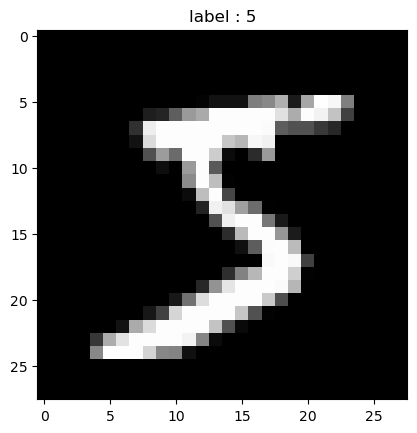

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

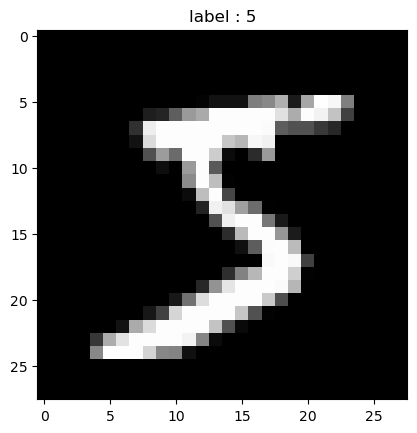

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')

plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

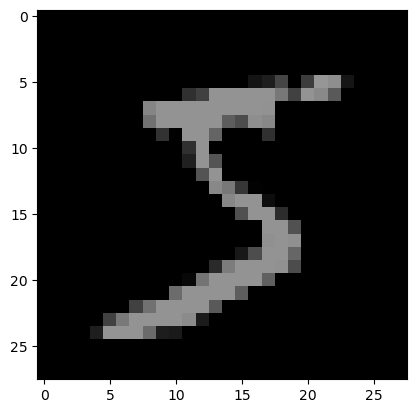

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [7]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)


(48000, 784)
(12000, 784)


In [10]:
class GetMiniBatch:
    """
Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)


    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [11]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 4, 5, 8, 1, 9, 9, 8, 9, 8, 5, 2, 8, 9, 2, 0, 3, 5, 5, 5],
      dtype=uint8))


In [78]:
import numpy as np
import scipy

class NeuralNetwork:
    def __init__(self, n_epochs=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=20, activate_function_key='tanh', lr=0.01, verbose=False):
        self.n_epoch = n_epochs
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activate_function_key = activate_function_key
        self.lr = lr
        self.verbose = verbose

    def initial_weight(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)

    def activation_function(self, X):
        if self.activate_function_key == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activate_function_key == 'tanh':
            return np.tanh(X)

    def softmax(self, X):
        return np.exp(X - np.max(X)) / np.sum(np.exp(X - np.max(X)), axis=1, keepdims=True)

    def loss_function(self, y, yt):
        delta =1e-7
        return -np.mean(yt*np.log(y+delta))

    def gradient_descent(self, X, y, yt):
        delta_a3 = (y - yt) / self.n_batch
        delta_b3 = np.sum(delta_a3, axis=0)
        delta_w3 = np.dot(self.z2.T, delta_a3)
        delta_z2 = np.dot(delta_a3, self.W3.T)

        self.W3 -= self.lr * delta_w3
        self.b3 -= self.lr * delta_b3

        # 2nd Layer
        if self.activate_function_key == 'sigmoid':
            delta_a2 = delta_z2 * (1 - self.activation_function_key(self.z2)) * self.activation_function(self.z2)
        elif self.activate_function_key == 'tanh':
            delta_a2 = delta_z2 * (1 - np.tanh(self.z2) ** 2)

        delta_b2 = np.sum(delta_a2, axis=0)
        delta_w2 = np.dot(self.z1.T, delta_a2)
        delta_z1 = np.dot(delta_a2, self.W2.T)

        self.W2 -= self.lr * delta_w2
        self.b2 -= self.lr * delta_b2

        # 1st Layer
        if self.activate_function_key == 'sigmoid':
            delta_a1 = delta_z1 * (1 - self.activation_function_key(self.z1)) * self.activation_function(self.z1)
        elif self.activate_function_key == 'tanh':
            delta_a1 = delta_z1 * (1 - np.tanh(self.z1) ** 2)

        delta_b1 = np.sum(delta_a1, axis=0)
        delta_w1 = np.dot(X.T, delta_a1)

        self.W1 -= self.lr * delta_w1
        self.b1 -= self.lr * delta_b1

    def fit(self, X, y, X_val=False, y_val=False):
        # initial weights
        self.initial_weight()

        # list to record the loss_function for each iteration
        self.log_loss = []
        self.log_loss_val = []

        # evaluate the estimation of train data per iteration: Accuracy
        self.log_acc = []
        self.log_acc_val = []

        for epoch in range(self.n_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            self.loss = 0
            self.true_y = np.array([])
            self.pred_y = np.array([])
            for mini_X_train, mini_y_train in get_mini_batch:
                # 1st layer
                self.z1 = self.activation_function(np.dot(mini_X_train, self.W1) + self.b1)
                # 2nd layer
                self.z2 = self.activation_function(np.dot(self.z1, self.W2) + self.b2)
                # 3rd layer
                output = self.softmax(np.dot(self.z2, self.W3) + self.b3)

                # Backpropagation
                self.gradient_descent(mini_X_train, output, mini_y_train)

                # record correct and estimated values for mini batch data
                self.true_y = np.concatenate([self.true_y, np.argmax(mini_y_train, axis=1)])
                self.pred_y = np.concatenate([self.pred_y, np.argmax(output, axis=1)])

                # loss function
                self.loss += self.loss_function(output, mini_y_train)

            # record the loss function for each iteration
            self.log_loss.append(self.loss / len(get_mini_batch))

            # Accuracy
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)

            # Calculate once val data has been entered
            if type(X_val) != bool:
                # 1st layer
                self.z1_val = self.activation_function(np.dot(X_val, self.W1) + self.b1)
                # 2nd layer
                self.z2_val = self.activation_function(np.dot(self.z1_val, self.W2) + self.b2)
                # 3rd layer
                output_val = self.softmax(np.dot(self.z2_val, self.W3) + self.b3)
                # loss function
                self.loss_val = self.loss_function(output_val, y_val)
                self.log_loss_val.append(self.loss_val)

                # Accuracy
                acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(output_val, axis=1))
                self.log_acc_val.append(acc_val)

            if self.verbose:
                print('epoch:{:>3} loss:{:>8,.3f}'.format(epoch, self.loss / self.n_batch, acc))

    def predict(self, X):
        # 1st layer
        self.pred_z1 = self.activation_function(np.dot(X, self.W1) + self.b1)
        # 2nd layer
        self.pred_z2 = self.activation_function(np.dot(self.pred_z1, self.W2) + self.b2)
        return np.argmax(np.dot(self.pred_z2, self.W3) + self.b3, axis=1)


In [79]:
#problem 1


n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print("W1 shape:", W1.shape)  # (784, 400)



W1 shape: (784, 400)


In [80]:
W1 = sigma*np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(n_nodes1)
W2 = sigma*np.random.randn(n_features, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma*np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('W1', W1.shape)
print('W2', W2.shape)
print('W3', W3.shape)
print('b1', b1.shape)
print('b2', b2.shape)
print('b3', b3.shape)

W1 (784, 400)
W2 (784, 200)
W3 (200, 10)
b1 (400,)
b2 (200,)
b3 (10,)


In [81]:
#problem 2
X=X_train[0:20]

In [82]:
z1= np.dot(X,W1) + b1
print('z1.shape', z1.shape)
print(z1)

z1.shape (20, 400)
[[ 0.06561681  0.08579199 -0.24070869 ... -0.06153567  0.02766827
  -0.12310661]
 [ 0.16531781  0.05701487 -0.10506156 ...  0.16111333  0.06325408
  -0.22428327]
 [ 0.02758923 -0.04011581 -0.21751833 ...  0.17925882  0.14609526
   0.0054568 ]
 ...
 [ 0.07399769  0.02934202 -0.11115684 ...  0.07705348  0.0564852
  -0.0175745 ]
 [ 0.16008602  0.27623196 -0.0680238  ...  0.14211545  0.08791238
  -0.27919652]
 [ 0.04464067 -0.10355959 -0.22235975 ...  0.16775322  0.12499289
   0.02560356]]


In [84]:
sig1 = 1/(1+np.exp(-z1))
print('sig1:', sig1.shape)

sig1: (20, 400)


In [85]:
z2 =np.dot(X,W2) + b2
print('z2.shape:', z2.shape)
print(z2)

z2.shape: (20, 200)
[[-0.03248126  0.13272949 -0.08073531 ... -0.13044701  0.13365118
  -0.02616551]
 [ 0.08583481  0.03262917 -0.043739   ... -0.01566084 -0.00998572
   0.02892075]
 [ 0.02518227 -0.052836   -0.00857735 ... -0.10812847  0.23828883
  -0.01302766]
 ...
 [ 0.06015586  0.12664644 -0.00731266 ... -0.06169339  0.09453084
  -0.06681638]
 [ 0.07368074  0.08583589  0.0416     ... -0.12574253  0.11276053
  -0.1400842 ]
 [ 0.09967534  0.04248424 -0.03915035 ... -0.14947741  0.09298507
   0.11149034]]


In [86]:
sig2 = 1/(1+np.exp(-z2))
print('sig2', sig2.shape)
print(sig2)


sig2 (20, 200)
[[0.4918804  0.53313374 0.47982713 ... 0.46743441 0.53336315 0.493459  ]
 [0.52144554 0.50815657 0.48906699 ... 0.49608487 0.49750359 0.50722968]
 [0.50629523 0.48679407 0.49785568 ... 0.47299419 0.55929192 0.49674313]
 ...
 [0.51503443 0.53161936 0.49817184 ... 0.48458154 0.52361513 0.48330212]
 [0.51841186 0.52144581 0.5103985  ... 0.46860572 0.5281603  0.46503611]
 [0.52489823 0.51061946 0.49021366 ... 0.46270007 0.52322953 0.52784375]]


In [88]:
z3 = np.dot(sig2, W3) + b3
print('z3.shape', z3.shape)
print(z3)

z3.shape (20, 10)
[[ 0.05212278  0.03895224 -0.10749067 -0.08591241  0.02345531  0.02201117
  -0.1058945   0.04850926 -0.04365798  0.06772087]
 [ 0.05482157  0.04467902 -0.11092415 -0.08648763  0.02004204  0.02228306
  -0.10163199  0.04961069 -0.04207939  0.07350408]
 [ 0.05253911  0.03671386 -0.11036075 -0.08683506  0.0191826   0.01897306
  -0.10530055  0.04932399 -0.04386253  0.07664424]
 [ 0.05575769  0.03842433 -0.11282424 -0.09081544  0.02051887  0.02326729
  -0.10546605  0.049068   -0.04301603  0.07405001]
 [ 0.05801583  0.03354914 -0.11496212 -0.08638392  0.02201055  0.02623248
  -0.10690941  0.05374567 -0.0384639   0.07354188]
 [ 0.05419128  0.03796905 -0.10904014 -0.08827942  0.01925708  0.02350036
  -0.10466545  0.04657374 -0.04052494  0.07648962]
 [ 0.05751117  0.03638738 -0.11099329 -0.08943635  0.01972055  0.02291826
  -0.10495406  0.05075023 -0.04106221  0.06722532]
 [ 0.05348992  0.03822111 -0.11598986 -0.08643015  0.0204716   0.02523599
  -0.10599287  0.05577962 -0.0415

In [61]:
sfmax = np.zeros([len(X),10])
for i in range(20):
    sfmax[i] = np.exp(z3[i])/np.sum(np.exp(z3[i]), axis =0)
    print('sfmax.shape', sfmax.shape)
    print(sfmax)
    print(np.sum(sfmax))

sfmax.shape (20, 10)
[[0.09267208 0.11159064 0.09369732 0.08927414 0.09690255 0.09147327
  0.09602731 0.11866238 0.10989074 0.09980957]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.    

In [89]:
softmax = np.exp(z3)/np.sum(np.exp(z3), axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.10607665 0.10468872 0.09042751 0.09239998 0.10307887 0.10293012
  0.09057196 0.10569403 0.09638795 0.10774421]
 [0.1062059  0.10513415 0.08998419 0.09221018 0.10257561 0.10280574
  0.09082423 0.10565392 0.09639735 0.10820875]
 [0.10614205 0.10447555 0.09018638 0.09233323 0.10265992 0.10263841
  0.0906439  0.10580134 0.09638751 0.1087317 ]
 [0.10645557 0.10462624 0.08994027 0.0919417  0.10276953 0.10305238
  0.09060451 0.1057458  0.09644318 0.10842081]
 [0.10657287 0.10399702 0.08964443 0.09224326 0.10280394 0.10323889
  0.09036922 0.10611876 0.09677118 0.10824044]
 [0.10622849 0.10451913 0.09022991 0.09212273 0.10258156 0.10301776
  0.0906255  0.10542237 0.09662873 0.10862382]
 [0.10666125 0.10443179 0.09012103 0.09208485 0.10270567 0.10303462
  0.09066693 0.10594255 0.09664888 0.10770243]
 [0.10617817 0.10456927 0.0896254  0.09231424 0.10272959 0.1032202
  0.09052587 0.10642156 0.09655274 0.10786296]
 [0.10626908 0.10528981 0.09011767 0.09219922 0.10266122 0

In [91]:
softmax = np.exp(z3).T/np.sum(np.exp(z3), axis=1)
print('softmax.shape', softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape (10, 20)
[[0.10607665 0.10468872 0.09042751 0.09239998 0.10307887 0.10293012
  0.09057196 0.10569403 0.09638795 0.10774421]
 [0.1062059  0.10513415 0.08998419 0.09221018 0.10257561 0.10280574
  0.09082423 0.10565392 0.09639735 0.10820875]
 [0.10614205 0.10447555 0.09018638 0.09233323 0.10265992 0.10263841
  0.0906439  0.10580134 0.09638751 0.1087317 ]
 [0.10645557 0.10462624 0.08994027 0.0919417  0.10276953 0.10305238
  0.09060451 0.1057458  0.09644318 0.10842081]
 [0.10657287 0.10399702 0.08964443 0.09224326 0.10280394 0.10323889
  0.09036922 0.10611876 0.09677118 0.10824044]
 [0.10622849 0.10451913 0.09022991 0.09212273 0.10258156 0.10301776
  0.0906255  0.10542237 0.09662873 0.10862382]
 [0.10666125 0.10443179 0.09012103 0.09208485 0.10270567 0.10303462
  0.09066693 0.10594255 0.09664888 0.10770243]
 [0.10617817 0.10456927 0.0896254  0.09231424 0.10272959 0.1032202
  0.09052587 0.10642156 0.09655274 0.10786296]
 [0.10626908 0.10528981 0.09011767 0.09219922 0.10266122 0

In [93]:
softmax = np.exp(z3)/np.sum(np.exp(z3),axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.10607665 0.10468872 0.09042751 0.09239998 0.10307887 0.10293012
  0.09057196 0.10569403 0.09638795 0.10774421]
 [0.1062059  0.10513415 0.08998419 0.09221018 0.10257561 0.10280574
  0.09082423 0.10565392 0.09639735 0.10820875]
 [0.10614205 0.10447555 0.09018638 0.09233323 0.10265992 0.10263841
  0.0906439  0.10580134 0.09638751 0.1087317 ]
 [0.10645557 0.10462624 0.08994027 0.0919417  0.10276953 0.10305238
  0.09060451 0.1057458  0.09644318 0.10842081]
 [0.10657287 0.10399702 0.08964443 0.09224326 0.10280394 0.10323889
  0.09036922 0.10611876 0.09677118 0.10824044]
 [0.10622849 0.10451913 0.09022991 0.09212273 0.10258156 0.10301776
  0.0906255  0.10542237 0.09662873 0.10862382]
 [0.10666125 0.10443179 0.09012103 0.09208485 0.10270567 0.10303462
  0.09066693 0.10594255 0.09664888 0.10770243]
 [0.10617817 0.10456927 0.0896254  0.09231424 0.10272959 0.1032202
  0.09052587 0.10642156 0.09655274 0.10786296]
 [0.10626908 0.10528981 0.09011767 0.09219922 0.10266122 0

In [94]:
np.tanh(z1)

array([[ 0.0655228 ,  0.08558212, -0.23616503, ..., -0.06145812,
         0.02766121, -0.12248845],
       [ 0.16382805,  0.05695317, -0.10467671, ...,  0.15973362,
         0.06316986, -0.22059673],
       [ 0.02758223, -0.04009431, -0.21415147, ...,  0.1773631 ,
         0.14506465,  0.00545674],
       ...,
       [ 0.07386293,  0.02933361, -0.11070128, ...,  0.07690134,
         0.0564252 , -0.01757269],
       [ 0.15873236,  0.2694141 , -0.06791908, ...,  0.14116636,
         0.08768659, -0.27216128],
       [ 0.04461104, -0.10319096, -0.21876604, ...,  0.16619715,
         0.124346  ,  0.02559797]])

In [98]:
(np.exp(z1) * np.exp(-z1)) / (np.exp(z1) + np.exp(-z1))


array([[0.49892554, 0.49816556, 0.48585648, ..., 0.49905483, 0.49980868,
        0.49623497],
       [0.49324445, 0.49918843, 0.49725315, ..., 0.49358008, 0.4990014 ,
        0.48768255],
       [0.49980977, 0.49959795, 0.48840023, ..., 0.49207274, 0.49471109,
        0.49999256],
       ...,
       [0.4986342 , 0.49978484, 0.49692686, ..., 0.49851935, 0.49920341,
        0.49992279],
       [0.49366082, 0.48151221, 0.49884542, ..., 0.49499294, 0.49807406,
        0.48112583],
       [0.49950222, 0.49733078, 0.48788867, ..., 0.49304627, 0.49611946,
        0.49983616]])

In [110]:
#problem 3
y = y_train_one_hot[0:20]
loss = -y*np.log(sfmax)/len(y)
print('shape:\n', loss.shape)
print(loss)

C:\Users\DoBUY\AppData\Local\Temp\ipykernel_52\879388456.py:3: RuntimeWarning: invalid value encountered in log
  loss = -y*np.log(sfmax)/len(y)


ValueError: dimension mismatch

(20, 10)

In [104]:
y.shape

(20, 10)

In [108]:
np.log(sfmax).shape

C:\Users\DoBUY\AppData\Local\Temp\ipykernel_52\1435967785.py:1: RuntimeWarning: invalid value encountered in log
  np.log(sfmax).shape


(20, 10)